<div style="direction:rtl"><h1>
پروژه چهار: یادگیری ماشین
</div>

<div style="direction:rtl">
هدف: هدف از انجام این پروژه تحلیل اطلاعات مربوط به به مشتریان چند فروشگاه و بررسی برگشت یا عدم برگشت مشتریان به فروشگاه است.
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#plt.style.use('dark_background')

<div style="direction:rtl"><h2>
بررسی مجموعه داده
</div>

<div style="direction:rtl">
مجموعه داده شامل ویژگی های مربوط به مشتریان چند فروشگاه از جمله شناسه، میزان و قیمت خرید، کشور، تاریخ، تعداد اقلام و اینکه مشتری برگشته است یا خیر می باشد. هدف از این بررسی ستون بازگشت یا عدم بازگشت است.
</div>

In [2]:
url = "https://raw.githubusercontent.com/ghminaei/Datasets/master/AI-CA4/data.csv"
df = pd.read_csv(url)
df.head()

Unnamed: 0  Customer ID  Total Quantity  Total Price         Country  \
0           0        16995              -1        -1.25  United Kingdom   
1           1        12552              85        13.52           Italy   
2           2        13192             298        15.90  United Kingdom   
3           3        16934             399         8.30  United Kingdom   
4           4        14976              27        11.90  United Kingdom   

         Date Is Back  Purchase Count  
0  2010-12-02      No               1  
1  2011-10-31     Yes              19  
2  2011-05-18     Yes              33  
3  2011-10-16      No              62  
4  2011-01-17     Yes              16

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Customer ID', 'Total Quantity', 'Total Price', 'Country',
       'Date', 'Is Back', 'Purchase Count'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 8 columns):
Unnamed: 0        4366 non-null int64
Customer ID       4366 non-null int64
Total Quantity    4366 non-null int64
Total Price       4366 non-null float64
Country           4366 non-null object
Date              4366 non-null object
Is Back           4366 non-null object
Purchase Count    4366 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 273.0+ KB


In [5]:
df[df['Total Quantity'] < 0].head()

Unnamed: 0  Customer ID  Total Quantity  Total Price         Country  \
0             0        16995              -1        -1.25  United Kingdom   
45           45        16810              -2       -33.90  United Kingdom   
71           71        17548            -132       -19.80  United Kingdom   
88           88        16611              -1        -8.50  United Kingdom   
115         115        12434             -13       -11.55       Australia   

           Date Is Back  Purchase Count  
0    2010-12-02      No               1  
45   2010-12-14     Yes               1  
71   2010-12-01     Yes               7  
88   2011-04-20     Yes               1  
115  2010-12-14     Yes               3

<div style="direction:rtl">
تعداد ردیف هایی که مقدار دارند با تعداد کل برابر است پس داده گمشده نداریم. اما بعضی مقادیر که به صورت طبیعی باید مثبت باشند (مثل قیمت) منفی است. این ممکن است به دلیل اسکیل شدن داده ها باشد و ما آن ها را تغییری نمی دهیم.
</div>

<div style="direction:rtl"><h2>
بررسی تاثیر هر ویژگی بر داده هدف و پیش پردازش
</div>

<div style="direction:rtl">
کلاس PreProcessor شامل متدهایی برای پیش پردازش داده هاست. 
    <br>
متد labelEncodeColumn:
    </br>
    <br>
ستون های ورودی را با روش label Encoding به عدد طبیعی تبدیل میکند جلوتر به بررسی این روش می پردازیم.
    </br>
<br>
متد oneHotEncodeColumn:
    </br>
<br>
ستون های ورودی را با روش one-hot Encoding به عدد طبیعی تبدیل میکند جلوتر به بررسی این روش می پردازیم.
    </br>
<br>
متد extractDateFeatures:
    </br>
<br>
ویژگی های مربوط به تاریخ را استخراج می کند. اینجا دو ویژگی ماه و آخر هفته بودن را استخراج و بررسی می کنیم. از آنجا که خرید در ماه های مختلف و روزهای مختلف می تواند روی برگشت یا عدم برگشت تاثیرگذار باشد این ویژگی ها را به دست آوردیم.
    </br>
<br>
متد scaleCols:
    </br>
<br>
ستون های ورودی را با روش standardScaler اسکیل می کند. اسکیل کردن برای مدل هایی که بر اساس فاصله کار میکنند لازم است چون یک داده با عدد بالا میتواند تاثیر شدیدی روی فاصله بگذارد. در روش یاد شده میانگین هر داده را کم میکنیم و بر انحراف معیار تقسیم میکنیم. 
    </br>
</div>

<div style="direction:rtl">
تفاوت one-hot encoding و label encoding:
    <br>
این دو روش هر روش هایی برای تبدیل داده های غیر عددی به عددی است تا این داده ها برای مدل های عددی قابل استفاده شوند. تفاوت آن ها در اولویت داده یا ندادن به اعداد نسب به هم هست. در label encoding به هر داده یک عدد نسب داده میشود و جاگزین آن میشود. در این حالت اگر مدل به ترتیب اعداد و بزرگ کوچکی اهمیت بدهد ممکن است یک ترتیب ناخواسته به داده ها اعمال کنیم اما one-hot encoding به تعداد داده های مختلف ستون اضافه کرده و بودن یا نبودن داده در آن دسته را نمایش میدهد. مثلا اگر ستون کشورها را در نظر بگیریم در خالت اول ممکن است آلمان 3 و فرانسه 4 شود و عدد فرانسه بی دلیل از آلمان بیشتر است اما در روش دوم برای آلمان به جای یک عدد ستون آلمان بودن 1 و بقیه صفر خواهند شد.
    </br>
</div>

In [6]:
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing

class PreProcessor():
  @staticmethod
  def labelEncodeColumn(dataFrame, cols):
    le = preprocessing.LabelEncoder()
    labeledDf = dataFrame.copy()
    for col in cols:
      labeledDf[col] = le.fit_transform(labeledDf[col])
    return labeledDf

  @staticmethod
  def oneHotEncodeColumn(dataFrame, cols):
    labeledDf = dataFrame.copy()
    for col in cols:
      newCols = pd.get_dummies(labeledDf[col], prefix=col)
      labeledDf = pd.concat([labeledDf, newCols], axis=1)
    return labeledDf

  @staticmethod
  def extractDateFeatures(dataFrame):
    df = dataFrame.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date.month'] = df['Date'].dt.month
    df['Date.weekend'] = np.where((df['Date'].dt.dayofweek) < 5, 1, 0)
    df['Date.day'] = df['Date'].dt.day
    return df
  
  @staticmethod
  def scaleCols(dataFrame, cols):
    ss = preprocessing.StandardScaler()
    df = dataFrame.copy()
    df[cols] = ss.fit_transform(df[cols])
    return df

<div style="direction:rtl">
        <br>
در اینجا نمودار information gain بر اساس ویژگی ها را به دست آوردیم. همانطور که مشاهده می شود شناسه مشتری بیشترین تاثیر را دارد اما استفاده از این فیچر درست نیست و باعث overffiting می شود چون به ازای هر مشتری یک شناسه وجود دارد و قرار هم نیست دیگر تکرار شود. یعنی دقیقا مشخص است که مشتری برگشته یا خیر. جلوتر این ویژگی را حذف میکنیم.
    </br>
        <br>
تاریخ خرید نیز شرایطی مشابه دارد جلوتر آن را نیز حذف کرده و از ویژگی های استخراج شده از تاریخ استفاده میکنیم. چرا که برای مثال سال خرید اهمیت چندانی در بررسی ما ندارد.
    </br>
        <br>
برای این محاسبات از label encoding استفاده کردیم چون ربطی به اولویت مقادیر ندارد.
    </br>
</div>

In [7]:
def calculateInformationGain(dataFrame):
  labeledDf = dataFrame.drop(columns =['Is Back', 'Unnamed: 0'])
  labeledDf = PreProcessor().labelEncodeColumn(labeledDf, ['Country', 'Date'])
  labels = labeledDf.columns.values.tolist()
  labeledDf.to_numpy()
  return dict(zip(labels, mutual_info_classif(labeledDf ,df['Is Back'], discrete_features=True)))

def plotInformationGain(informationGains):
  plt.figure(figsize=(15, 5))
  plt.plot(list(informationGains.keys()), list(informationGains.values()))
  plt.xlabel("Features")
  plt.ylabel("Information Gain")
  plt.title("Information Gain value per Feature")
  plt.show()

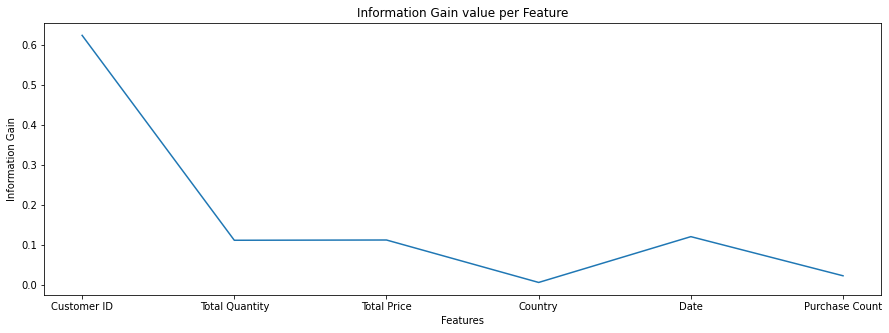

In [8]:
plotInformationGain(calculateInformationGain(df))

<div style="direction:rtl">
در اینجا ویزگی های ماه و آخر هفته بودن نیز بررسی شده. همانطور که مشاهده می شود ماه خرید به نسبت تاثیر خوبی دارد و برای بررسی به دلایل یاد شده از تاریخ مناسب تر است.
</div>

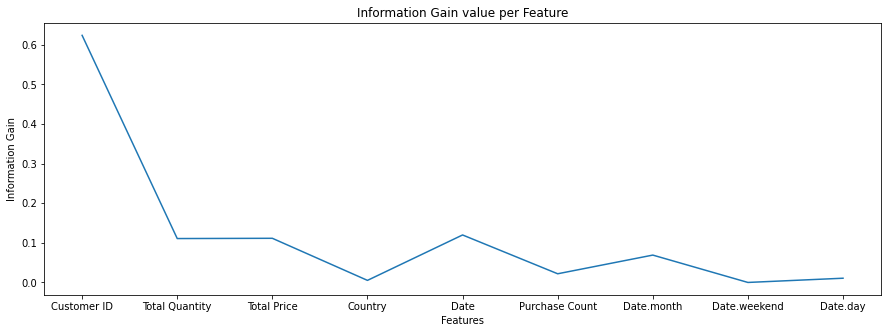

In [9]:
plotInformationGain(calculateInformationGain(PreProcessor().extractDateFeatures(df)))

<div style="direction:rtl">
در اینجا شیوه انجام one hot encoding را مشاهده میکنیم.
</div>

In [10]:
PreProcessor().oneHotEncodeColumn(PreProcessor().extractDateFeatures(df), ['Country', 'Date.month']).head()

Unnamed: 0  Customer ID  Total Quantity  Total Price         Country  \
0           0        16995              -1        -1.25  United Kingdom   
1           1        12552              85        13.52           Italy   
2           2        13192             298        15.90  United Kingdom   
3           3        16934             399         8.30  United Kingdom   
4           4        14976              27        11.90  United Kingdom   

        Date Is Back  Purchase Count  Date.month  Date.weekend  ...  \
0 2010-12-02      No               1          12             1  ...   
1 2011-10-31     Yes              19          10             1  ...   
2 2011-05-18     Yes              33           5             1  ...   
3 2011-10-16      No              62          10             0  ...   
4 2011-01-17     Yes              16           1             1  ...   

   Date.month_3  Date.month_4  Date.month_5  Date.month_6  Date.month_7  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             1             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Date.month_8  Date.month_9  Date.month_10  Date.month_11  Date.month_12  
0             0             0              0              0              1  
1             0             0              1              0              0  
2             0             0              0              0              0  
3             0             0              1              0              0  
4             0             0              0              0              0  

[5 rows x 60 columns]

In [11]:
a = PreProcessor().oneHotEncodeColumn(PreProcessor().extractDateFeatures(df), ['Country', 'Date.month']).head()
a = a.drop(columns =['Is Back', 'Unnamed: 0', 'Country', 'Date'])
PreProcessor().scaleCols(a, a.columns.values.tolist()).head()

Customer ID  Total Quantity  Total Price  Purchase Count  Date.month  \
0     1.121402       -1.026784    -1.822026       -1.224167    1.091842   
1    -1.291143       -0.483712     0.641479       -0.349762    0.595550   
2    -0.943624        0.861336     1.038441        0.330331   -0.645179   
3     1.088279        1.499129    -0.229171        1.739094    0.595550   
4     0.025087       -0.849970     0.371277       -0.495496   -1.637763   

   Date.weekend  Date.day  Country_Australia  Country_Austria  \
0           0.5 -1.609456                0.0              0.0   
1           0.5  1.544208                0.0              0.0   
2           0.5  0.130496                0.0              0.0   
3          -2.0 -0.086998                0.0              0.0   
4           0.5  0.021749                0.0              0.0   

   Country_Bahrain  ...  Date.month_3  Date.month_4  Date.month_5  \
0              0.0  ...           0.0           0.0          -0.5   
1              0.0  ...           0.0           0.0          -0.5   
2              0.0  ...           0.0           0.0           2.0   
3              0.0  ...           0.0           0.0          -0.5   
4              0.0  ...           0.0           0.0          -0.5   

   Date.month_6  Date.month_7  Date.month_8  Date.month_9  Date.month_10  \
0           0.0           0.0           0.0           0.0      -0.816497   
1           0.0           0.0           0.0           0.0       1.224745   
2           0.0           0.0           0.0           0.0      -0.816497   
3           0.0           0.0           0.0           0.0       1.224745   
4           0.0           0.0           0.0           0.0      -0.816497   

   Date.month_11  Date.month_12  
0            0.0            2.0  
1            0.0           -0.5  
2            0.0           -0.5  
3            0.0           -0.5  
4            0.0           -0.5  

[5 rows x 56 columns]

<div style="direction:rtl"><h2>
پیاده سازی مدل های دسته بندی:
</div>

<div style="direction:rtl">
کلاس Classifier والد مدل های دسته بندی است که متدهای پایه را پیاده سازی میکند
<br>
متد split:
</br>
<br>
مجموعه داده را به دو دسته test و train میشکند
</br>
<br>
متد analyze:
</br>
<br>
معیارهای دقت را محاسبه میکند
    </br>
<br>
متد plotMetrics:
    </br>
<br>
معیارها را براساس هایپرپارامتر رسم میکند
    </br>
    <br>
متد findBestParameter:
        </br>
<br>
بهنرین هایپرپارامتر را با توجه به معیارها به دست میاورد. این تابع سعی میکند بهنرین مقدار accuracy بدون خراب کردن precision محاسبه شود.
    </br>
</div>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def updateParameters(key, values):
  return key, values["Accuracy"], values["Precision"], values["Recall"]

class Classifier():
  def __init__(self, dataSet):
    self.dataSet = dataSet.copy()

  def split(self):
    self.train, self.test = train_test_split(self.dataSet, random_state=41)
    self.trainX = self.train.drop(columns =['Is Back'])
    self.trainY = self.train['Is Back']

    self.testX = self.test.drop(columns =['Is Back'])
    self.testY = self.test['Is Back']

  def analyze(self, predicted, target):
    result = {}
    result["Precision"] = metrics.precision_score(target, predicted, average='weighted')
    result["Recall"] = metrics.recall_score(target, predicted, average='weighted')
    result["Accuracy"] = metrics.accuracy_score(target, predicted)
    return result
  
  @staticmethod
  def plotMetrics(resTrain, resTest, title, xLabel):
    test = pd.DataFrame(resTest).T
    train = pd.DataFrame(resTrain).T
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    fig.set_figheight(10)
    fig.suptitle(title)
    fig.tight_layout(pad=3.0)

    ax1.plot(test.index, test['Accuracy'], train['Accuracy'])
    ax1.set_title("accuracy")
    ax1.set_xlabel(xLabel)
    ax1.legend(['test', 'train'])

    ax2.plot(test.index, test['Precision'], train['Precision'])
    ax2.set_title("precision")
    ax2.set_xlabel(xLabel)
    ax2.legend(['test', 'train'])

    ax3.plot(test.index, test['Recall'], train['Recall'])
    ax3.set_title("recall")
    ax2.set_xlabel(xLabel)
    ax3.legend(['test', 'train'])

    fig.show()

  @staticmethod
  def findBestParameter(resTest):
    TOLERANCE = 0.005
    bestParam = -1
    bestAccuracy = -1
    bestPrecision = -1
    bestRecall = -1
    for key, values in resTest.items():
      if values["Accuracy"] > bestAccuracy:
        if abs(values["Accuracy"] - bestAccuracy) >= TOLERANCE:
          bestParam, bestAccuracy, bestPrecision, bestRecall = updateParameters(key, values)
        elif abs(values["Accuracy"] - bestAccuracy) < TOLERANCE:
          if values["Precision"] >= bestPrecision:
            bestParam, bestAccuracy, bestPrecision, bestRecall = updateParameters(key, values)
      elif values["Accuracy"] < bestAccuracy:
        if abs(values["Accuracy"] - bestAccuracy) < TOLERANCE:
          if values["Precision"] > bestPrecision:
            bestParam, bestAccuracy, bestPrecision, bestRecall = updateParameters(key, values)
      else:
        if values["Precision"] > bestPrecision:
          bestParam, bestAccuracy, bestPrecision, bestRecall = updateParameters(key, values)
    
    return {"Parameter": bestParam, "Accuracy": bestAccuracy, "Precision": bestPrecision, "Recall": bestRecall}

  @staticmethod
  def printBestParameter(bestResult):
    res = {}
    if "Parameter" in bestResult:
      res["Parameter"] = str(bestResult["Parameter"])
    res["Accuracy"] = "{:.2f}".format(bestResult["Accuracy"]*100)
    res["Precision"] = "{:.2f}".format(bestResult["Precision"]*100)
    res["Recall"] = "{:.2f}".format(bestResult["Recall"]*100)
    print(pd.Series(res))
    

    


### K Nearest Keighbor Classifier

<div style="direction:rtl">
در این مدل فاصله داده ای که میخواهیم تشخیص دهیم با k تا نزدیک ترین داده ها میسنجیم از بین آنها این داده با احتمال بالا به دسته ای تعلق دارد که بیشتر است.
</div>

<div style="direction:rtl">
برای پیش پردازش ستون های تاریخ و شناسه را به دلایل گفته شده حذف میکنیم و ستون های کشور و برگشت مشتری را با روش label encoding به عدد تبدیل میکنیم چون در این مدل بزرگی و کوچکی اعداد برای ویژگی ها اهمیتی ندارد. از آنجا که این مدل مبتنی بر فاصله است داده ها را اسکیل میکنیم اما با بررسی انجام شده نتایج روی داده آزمون افت کرد پس اسکیل را حذف میکنیم.
</div>

<div style="direction:rtl">
در ادامه نمودار نتایج داده آموزش و آزمون برای معیارهای دقت بر اساس تعداد همسایگان کشیده شده است. بهترین تعداد نیز محاسبه شده.
</div>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

class knnClassifier(Classifier):
  def cleanData(self):
    p = PreProcessor()
    self.dataSet = p.extractDateFeatures(self.dataSet)
    self.dataSet = p.labelEncodeColumn(self.dataSet, ['Country', 'Is Back'])
    self.dataSet = self.dataSet.drop(columns=['Customer ID', 'Unnamed: 0', 'Date'])
    self.dataSet = self.dataSet.drop(columns=['Date.weekend'])
    cols = self.dataSet.columns.values.tolist().copy()
    cols.remove('Is Back')
    #self.dataSet = p.scaleCols(self.dataSet, cols)

  def trainModel(self, kn):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(self.trainX, self.trainY)
    predictedTest = knn.predict(self.testX)
    predictedTrain = knn.predict(self.trainX)
    return predictedTest, predictedTrain

  def tuneParameters(self):
    resTest = {}
    resTrain = {}
    for k in range(1, 80):
      predictedTest, predictedTrain = self.trainModel(k)
      resTest[k] = self.analyze(predictedTest, self.testY)
      resTrain[k] = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest
  
  def getBestClassifier(self, resTest):
    params = self.findBestParameter(resTest)
    return KNeighborsClassifier(n_neighbors=params["Parameter"])


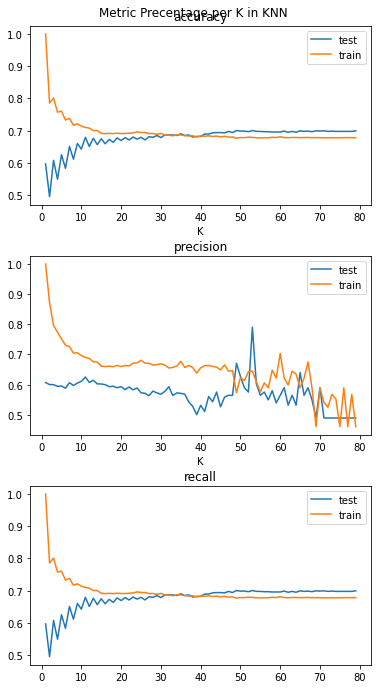

In [14]:
knn = knnClassifier(df)
knn.cleanData()
knn.split()
resKnn = knn.tuneParameters()
knn.plotMetrics(resKnn[0], resKnn[1], "Metric Precentage per K in KNN", "K")

In [15]:
print("Metrics for test data in KNN")
knn.printBestParameter(knn.findBestParameter(resKnn[1]))

Metrics for test data in KNN
Parameter       53
Accuracy     70.05
Precision    79.03
Recall       70.05
dtype: object


In [16]:
print("Metrics for train data in KNN")
knn.printBestParameter(resKnn[0][53])

Metrics for train data in KNN
Accuracy     67.93
Precision    64.49
Recall       67.93
dtype: object


In [17]:
bestKnn = knn.getBestClassifier(resKnn[1])

### Decision Tree Classifier

<div style="direction:rtl">
درخت تصمیم یک روش دسته بندی است که در آن گره های میانی ویژگی ها و برگ ها دسته ها هستند در هر مرحله داده ها با اساس ویژگی مربوط به گره فعلی در گروه های مختلف قرار میگیرند تا به یک برگ برسیم.
</div>

<div style="direction:rtl">
پیش پردازش در این مدل مانند مدل نزدیک ترین همسایه ها انجام شده.
</div>

<div style="direction:rtl">
در ادامه نمودارهای مربوط به داده تست و آزمون برای معیارهای مختلیف برحسب عمق درخت کشیده شده است. همانطور که دیده می شود از یک جایی به بعد مدل برای داده آموزش بسیار بهتر از آزمون عمل میکند که این نقطه همان جایی است که overfitting اتفاق افتاده. در ادامه بهترین عمق محاسبه شده است.
</div>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

class DtClassifier(Classifier):
  def cleanData(self):
    p = PreProcessor()
    self.dataSet = p.extractDateFeatures(self.dataSet)
    self.dataSet = p.labelEncodeColumn(self.dataSet, ['Country', 'Is Back'])
    self.dataSet = self.dataSet.drop(columns =['Customer ID', 'Unnamed: 0', 'Date'])
    cols = self.dataSet.columns.values.tolist().copy()
    cols.remove('Is Back')
    self.dataSet = p.scaleCols(self.dataSet, cols)

  def trainModel(self, d):
    dt = DecisionTreeClassifier(random_state=0, max_depth = d) 
    dt.fit(self.trainX, self.trainY)
    predictedTest = dt.predict(self.testX)
    predictedTrain = dt.predict(self.trainX)
    return predictedTest, predictedTrain

  def tuneParameters(self):
    resTest = {}
    resTrain = {}
    for k in range(1, 100):
      predictedTest, predictedTrain = self.trainModel(k)
      resTest[k] = self.analyze(predictedTest, self.testY)
      resTrain[k] = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest

  def getBestClassifier(self, resTest):
    params = self.findBestParameter(resTest)
    return DecisionTreeClassifier(random_state=0, max_depth = params["Parameter"])


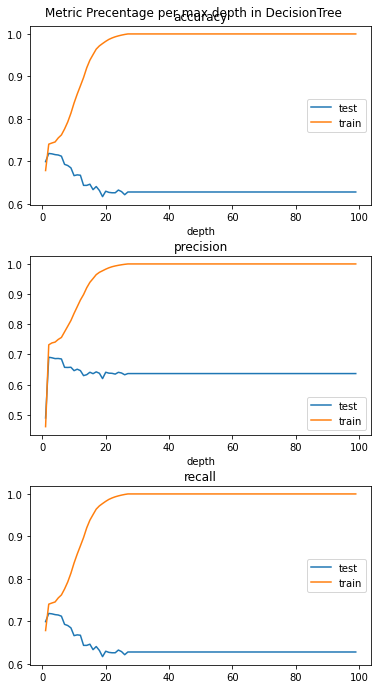

In [19]:
dt = DtClassifier(df)
dt.cleanData()
dt.split()
resDt = dt.tuneParameters()
dt.plotMetrics(resDt[0], resDt[1], "Metric Precentage per max depth in DecisionTree", "depth")

In [20]:
print("Metrics for test data in DecisionTree")
dt.printBestParameter(dt.findBestParameter(resDt[1]))

Metrics for test data in DecisionTree
Parameter        2
Accuracy     71.89
Precision    69.08
Recall       71.89
dtype: object


In [21]:
print("Metrics for train data in DecisionTree")
dt.printBestParameter(resDt[0][2])

Metrics for train data in DecisionTree
Accuracy     74.07
Precision    73.20
Recall       74.07
dtype: object


In [22]:
bestDt = dt.getBestClassifier(resDt[1])

### Logistic Classifier

<div style="direction:rtl">
این روش نیز یک روش دسته بندی است که تعلق یک داده به دسته 1 را با ساختن یک مدل regression محاسبه میکند.
</div>

<div style="direction:rtl">
برای پیش پردازش باید از روش one-hot encoding استفاده کنیم چون در این روش بزرگی و کوچکی اعداد مهم است. اسکیل کردن باعث کاهش دقت در داده های آزمون میشود.
</div>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

class LrClassifier(Classifier):
  def cleanData(self):
    p = PreProcessor()
    self.dataSet = p.extractDateFeatures(self.dataSet)
    self.dataSet = p.labelEncodeColumn(self.dataSet, ['Is Back'])
    self.dataSet = p.oneHotEncodeColumn(self.dataSet, ['Country', 'Date.month', 'Date.day'])
    self.dataSet = self.dataSet.drop(columns =['Customer ID', 'Unnamed: 0', 'Date', 'Country', 'Date.month'])
    cols = self.dataSet.columns.values.tolist().copy()
    cols.remove('Is Back')
    #self.dataSet = p.scaleCols(self.dataSet, cols)

  def trainModel(self):
    lr = LogisticRegression(random_state=0)
    lr.fit(self.trainX, self.trainY)
    predictedTest = lr.predict(self.testX)
    predictedTrain = lr.predict(self.trainX)
    return predictedTest, predictedTrain

  def tuneParameters(self):
    predictedTest, predictedTrain = self.trainModel()
    resTest = self.analyze(predictedTest, self.testY)
    resTrain = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest

  def getBestClassifier(self):
    return LogisticRegression(random_state=0)


In [24]:
lr = LrClassifier(df)
lrd = lr.cleanData()
lr.split()
lr.dataSet.head()

Total Quantity  Total Price  Is Back  Purchase Count  Date.weekend  \
0              -1        -1.25        0               1             1   
1              85        13.52        1              19             1   
2             298        15.90        1              33             1   
3             399         8.30        0              62             0   
4              27        11.90        1              16             1   

   Date.day  Country_Australia  Country_Austria  Country_Bahrain  \
0         2                  0                0                0   
1        31                  0                0                0   
2        18                  0                0                0   
3        16                  0                0                0   
4        17                  0                0                0   

   Country_Belgium  ...  Date.day_22  Date.day_23  Date.day_24  Date.day_25  \
0                0  ...            0            0            0            0   
1                0  ...            0            0            0            0   
2                0  ...            0            0            0            0   
3                0  ...            0            0            0            0   
4                0  ...            0            0            0            0   

   Date.day_26  Date.day_27  Date.day_28  Date.day_29  Date.day_30  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Date.day_31  
0            0  
1            1  
2            0  
3            0  
4            0  

[5 rows x 86 columns]

In [25]:
resTrainLr, resTestLr = lr.tuneParameters()

In [26]:
print("Metrics for train data in LogisticRegression")
lr.printBestParameter(resTrainLr)

Metrics for train data in LogisticRegression
Accuracy     74.28
Precision    73.23
Recall       74.28
dtype: object


In [27]:
print("Metrics for test data in LogisticRegression")
lr.printBestParameter(resTestLr)

Metrics for test data in LogisticRegression
Accuracy     72.07
Precision    69.43
Recall       72.07
dtype: object


In [28]:
bestLr = lr.getBestClassifier()

<div style="direction:rtl"><h2>
یادگیری گروهی:
</div>

##### Bagging + Knn:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

class KnnBaggingClassifier(knnClassifier):
  def trainModel(self, kn):
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=kn), max_samples=0.5, max_features=0.5)
    bagging.fit(self.trainX, self.trainY)
    predictedTest = bagging.predict(self.testX)
    predictedTrain = bagging.predict(self.trainX)
    return predictedTest, predictedTrain

  def tuneParameters(self):
    resTest = {}
    resTrain = {}
    for k in range(1, 100):
      predictedTest, predictedTrain = self.trainModel(k)
      resTest[k] = self.analyze(predictedTest, self.testY)
      resTrain[k] = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest


In [30]:
bagK = KnnBaggingClassifier(df)
bagKD = bagK.cleanData()
bagK.split()
resTrainBagK, resTestBagK = bagK.tuneParameters()

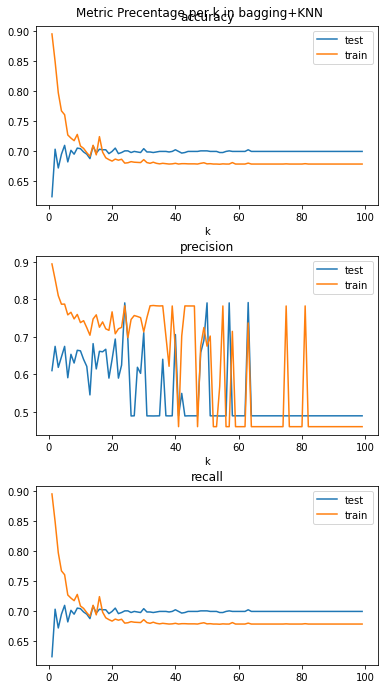

In [31]:
bagK.plotMetrics(resTrainBagK, resTestBagK, "Metric Precentage per k in bagging+KNN", "k")

In [32]:
print("Metrics for test data in bagging+KNN")
bagK.printBestParameter(bagK.findBestParameter(resTestBagK))

Metrics for test data in bagging+KNN
Parameter       63
Accuracy     70.24
Precision    79.12
Recall       70.24
dtype: object


In [33]:
print("Metrics for train data in bagging+KNN")
bagK.printBestParameter(bagK.findBestParameter(resTrainBagK))

Metrics for train data in bagging+KNN
Parameter        1
Accuracy     89.46
Precision    89.40
Recall       89.46
dtype: object


###### Bagging + DecisionTree

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

class DecisionTreeBaggingClassifier(DtClassifier):
  def trainModel(self, d):
    bagging = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth = d), max_samples=0.5, max_features=0.5)
    bagging.fit(self.trainX, self.trainY)
    predictedTest = bagging.predict(self.testX)
    predictedTrain = bagging.predict(self.trainX)
    return predictedTest, predictedTrain

  def tuneParameters(self):
    resTest = {}
    resTrain = {}
    for k in range(1, 100):
      predictedTest, predictedTrain = self.trainModel(k)
      resTest[k] = self.analyze(predictedTest, self.testY)
      resTrain[k] = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest

In [35]:
bagDt = DecisionTreeBaggingClassifier(df)
bagDtD = bagDt.cleanData()
bagDt.split()
resTrainBagDt, resTestBagDt = bagDt.tuneParameters()

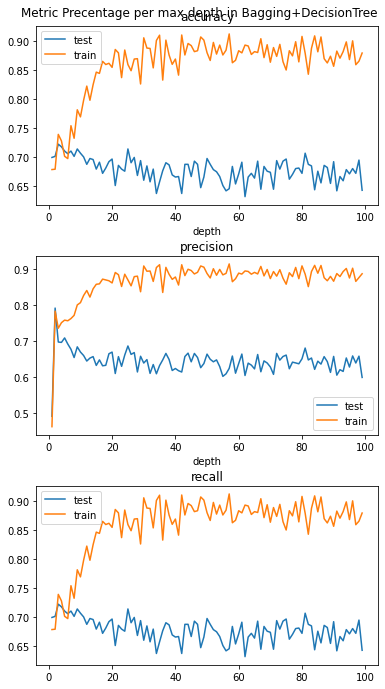

In [36]:
bagDt.plotMetrics(resTrainBagDt, resTestBagDt, "Metric Precentage per max depth in Bagging+DecisionTree", "depth")

In [37]:
print("Metrics for test data in Bagging+DecisionTree")
bagDt.printBestParameter(bagDt.findBestParameter(resTestBagDt))

Metrics for test data in Bagging+DecisionTree
Parameter        3
Accuracy     72.25
Precision    69.62
Recall       72.25
dtype: object


In [38]:
print("Metrics for train data in Bagging+DecisionTree")
bagDt.printBestParameter(resTestBagDt[3])

Metrics for train data in Bagging+DecisionTree
Accuracy     72.25
Precision    69.62
Recall       72.25
dtype: object


##### Random Forest:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

class RFClassifier(DtClassifier):
  def trainModel(self, depth=None, nTree=100):
    rfc = RandomForestClassifier(n_estimators=nTree, max_depth=depth, random_state=41)
    rfc.fit(self.trainX, self.trainY)
    predictedTest = rfc.predict(self.testX)
    predictedTrain = rfc.predict(self.trainX)
    return predictedTest, predictedTrain

  def tuneDepthParameter(self):
    resTest = {}
    resTrain = {}
    for depth in range(1, 100):
      predictedTest, predictedTrain = self.trainModel(depth=depth)
      resTest[depth] = self.analyze(predictedTest, self.testY)
      resTrain[depth] = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest

  def tuneNTreeParameter(self):
    resTest = {}
    resTrain = {}
    for n in range(2, 200):
      predictedTest, predictedTrain = self.trainModel(nTree=n)
      resTest[n] = self.analyze(predictedTest, self.testY)
      resTrain[n] = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest
  
  def runWithParameter(self, depth, nTree):
    predictedTest, predictedTrain = self.trainModel(depth, nTree)
    resTest = self.analyze(predictedTest, self.testY)
    resTrain = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest

In [40]:
rfc = RFClassifier(df)
rfcD = rfc.cleanData()
rfc.split()

<div style="direction:rtl"><h5>
تاثیر عمق بر جنگل تصادفی
</div>

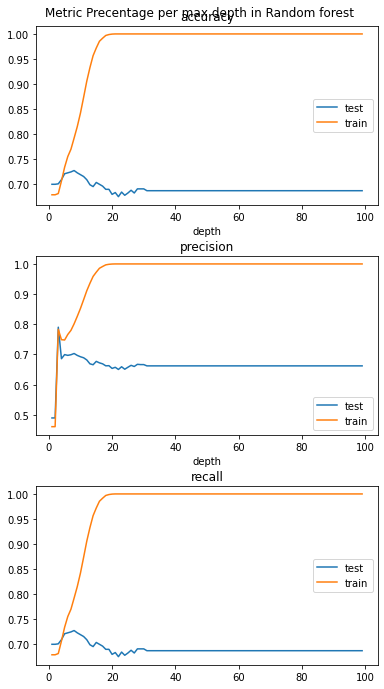

In [41]:
resTrainRfc1, resTestRfc1 = rfc.tuneDepthParameter()
rfc.plotMetrics(resTrainRfc1, resTestRfc1, "Metric Precentage per max depth in Random forest", "depth")

In [42]:
print("Metrics for test data in Random Forest - depth")
rfc.printBestParameter(rfc.findBestParameter(resTestRfc1))

Metrics for test data in Random Forest - depth
Parameter        8
Accuracy     72.71
Precision    70.31
Recall       72.71
dtype: object


In [43]:
print("Metrics for train data in Random Forest - depth")
rfc.printBestParameter(resTestRfc1[8])

Metrics for train data in Random Forest - depth
Accuracy     72.71
Precision    70.31
Recall       72.71
dtype: object


<div style="direction:rtl"><h5>
تاثیر تعداد درختان بر جنگل تصادفی
</div>

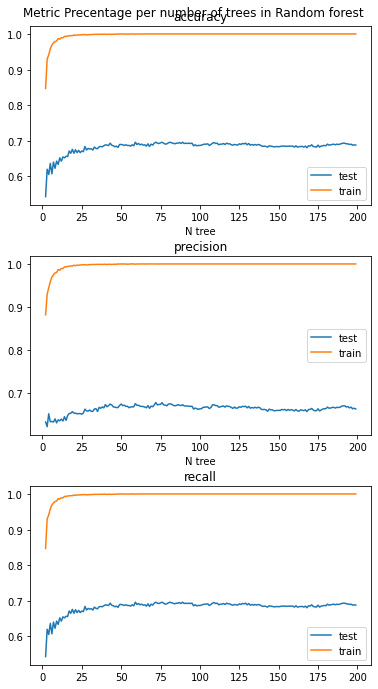

In [44]:
resTrainRfc2, resTestRfc2 = rfc.tuneNTreeParameter()
rfc.plotMetrics(resTrainRfc2, resTestRfc2, "Metric Precentage per number of trees in Random forest", "N tree")

In [45]:
print("Metrics for test data in Random Forest - n tree")
rfc.printBestParameter(rfc.findBestParameter(resTestRfc2))

Metrics for test data in Random Forest - n tree
Parameter       72
Accuracy     69.60
Precision    67.66
Recall       69.60
dtype: object


In [46]:
print("Metrics for train data in Random Forest - n tree")
rfc.printBestParameter(resTestRfc2[72])

Metrics for train data in Random Forest - n tree
Accuracy     69.60
Precision    67.66
Recall       69.60
dtype: object


In [47]:
resTrainRfc, resTestRfc = rfc.runWithParameter(8, 72)

In [48]:
print("Metrics for train data in Random Forest")
rfc.printBestParameter(resTrainRfc)

Metrics for train data in Random Forest
Accuracy     79.29
Precision    80.35
Recall       79.29
dtype: object


In [49]:
print("Metrics for test data in Random Forest")
rfc.printBestParameter(resTestRfc)

Metrics for test data in Random Forest
Accuracy     72.62
Precision    70.18
Recall       72.62
dtype: object


##### Hard voting:

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import VotingClassifier

class HardVotingClassifier(Classifier):
  def cleanData(self):
    p = PreProcessor()
    self.dataSet = p.extractDateFeatures(self.dataSet)
    self.dataSet = p.labelEncodeColumn(self.dataSet, ['Is Back'])
    self.dataSet = p.oneHotEncodeColumn(self.dataSet, ['Country', 'Date.month'])
    self.dataSet = self.dataSet.drop(columns =['Customer ID', 'Unnamed: 0', 'Date', 'Country', 'Date.month'])
    cols = self.dataSet.columns.values.tolist().copy()
    cols.remove('Is Back')
    self.dataSet = p.scaleCols(self.dataSet, cols)

  def trainModel(self, kn, lr, dt):
    hv = VotingClassifier(estimators=[('kn', kn), ('lr', lr), ('dt', dt)], voting='hard')
    hv.fit(self.trainX, self.trainY)
    predictedTest = hv.predict(self.testX)
    predictedTrain = hv.predict(self.trainX)
    return predictedTest, predictedTrain

  def tuneParameters(self, kn, lr, dt):
    predictedTest, predictedTrain = self.trainModel(kn, lr, dt)
    resTest = self.analyze(predictedTest, self.testY)
    resTrain = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest


In [51]:
hv = HardVotingClassifier(df)
hv.cleanData()
hv.split()
resTrainHv, resTestHv = hv.tuneParameters(bestKnn, bestLr, bestDt)

In [52]:
print("Metrics for train data in Hard voting")
hv.printBestParameter(resTrainHv)

Metrics for train data in Hard voting
Accuracy     74.31
Precision    73.39
Recall       74.31
dtype: object


In [53]:
print("Metrics for test data in Hard voting")
hv.printBestParameter(resTestHv)

Metrics for test data in Hard voting
Accuracy     72.16
Precision    69.52
Recall       72.16
dtype: object


<div style="direction:rtl"><h2>
تاثیر bagging بر overfitting:
</div>

<div style="direction:rtl">
در این روش با تبدیل داده به قطعات کوچکتر و دادن هر قسمت داده به یک مدل و بررسی نظرات مدل ها با تجربه های متفاوت از overffiting کم میکنیم. از آنجا که یک مدل همه داده را ندیده است با احتمال کمتری overfit می شود.

در ادامه به بررسی تاثیر bagging بر یک درخت تصمیم با عمق 40 که طبق نمودارهای قبلی دچار overfitting شده میپردازیم.
</div>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

class OverFittedDTClassifier(Classifier):
  def cleanData(self):
    p = PreProcessor()
    self.dataSet = p.extractDateFeatures(self.dataSet)
    self.dataSet = p.labelEncodeColumn(self.dataSet, ['Country', 'Is Back'])
    self.dataSet = self.dataSet.drop(columns =['Customer ID', 'Unnamed: 0', 'Date'])
    cols = self.dataSet.columns.values.tolist().copy()
    cols.remove('Is Back')
    self.dataSet = p.scaleCols(self.dataSet, cols)

  def trainModel(self, d):
    dt = DecisionTreeClassifier(random_state=0, max_depth = d) 
    dt.fit(self.trainX, self.trainY)
    predictedTest = dt.predict(self.testX)
    predictedTrain = dt.predict(self.trainX)
    return predictedTest, predictedTrain, dt

  def getOverfittedClassifier(self, overfitParam):
    resTest = {}
    resTrain = {}
    predictedTest, predictedTrain, cl = self.trainModel(overfitParam)
    resTest = self.analyze(predictedTest, self.testY)
    resTrain = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest, cl


In [55]:
overfittedCl = OverFittedDTClassifier(df)
overfittedCl.cleanData()
overfittedCl.split()
resTrainOf, resTestOf, clOf = overfittedCl.getOverfittedClassifier(40)

In [56]:
print("Metrics for train data in Overfitted model")
overfittedCl.printBestParameter(resTrainOf)

Metrics for train data in Overfitted model
Accuracy     100.00
Precision    100.00
Recall       100.00
dtype: object


In [57]:
print("Metrics for test data in Overfitted model")
overfittedCl.printBestParameter(resTestOf)

Metrics for test data in Overfitted model
Accuracy     62.82
Precision    63.66
Recall       62.82
dtype: object


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

class OverfittedDTBaggingClassifier(DtClassifier):
  def trainModel(self, overfitCl):
    bagging = BaggingClassifier(overfitCl, max_samples=0.5, max_features=0.5)
    bagging.fit(self.trainX, self.trainY)
    predictedTest = bagging.predict(self.testX)
    predictedTrain = bagging.predict(self.trainX)
    return predictedTest, predictedTrain

  def getResult(self, overfitCl):
    resTest = {}
    resTrain = {}
    predictedTest, predictedTrain = self.trainModel(overfitCl)
    resTest = self.analyze(predictedTest, self.testY)
    resTrain = self.analyze(predictedTrain, self.trainY)
    return resTrain, resTest

In [59]:
bagOverfittedCl = OverfittedDTBaggingClassifier(df)
bagOverfittedCl.cleanData()
bagOverfittedCl.split()
resTrainBOf, resTestBOf = bagOverfittedCl.getResult(clOf)

In [60]:
print("Metrics for train data in Overfitted model after bagging")
overfittedCl.printBestParameter(resTrainBOf)

Metrics for train data in Overfitted model after bagging
Accuracy     85.37
Precision    86.04
Recall       85.37
dtype: object


In [61]:
print("Metrics for test data in Overfitted model after bagging")
overfittedCl.printBestParameter(resTestBOf)

Metrics for test data in Overfitted model after bagging
Accuracy     69.78
Precision    66.44
Recall       69.78
dtype: object


<div style="direction:rtl">
همانطور که میبینید اختلاف بین نتایج داده های آزمون و آموزش با این کار کاهش یافت که ناشی دیده نشدن همه داده توسط یک مدل است.
</div>

<div style="direction:rtl"><h2>
bootstarping چیست و چه تاثیری بر بایاس و واریانس دارد؟
</div>

<div style="direction:rtl">
این روش یک روش نمونه برداری است که تعدادی نمونه را با جاگذاری نمونه برداری میکند و در جنگل تصادفی هر درخت از یک دیتای مختلف شروع میکند. درواقع روش bagging یک روش یادگیری جمعی مبتنی بر bootstraping است که با استفاده از دیتای اصلی تعدادی زیر مجموعه با نمونه برداری ایجاد میکند و هر مجموعه یک دیتای آموزشیست که به یک مدل داده میشود. با این روش واریانس کاهش یافته و جلوی overfitting گرفته میشود.
</div>

<div style="direction:rtl"><h2>
بررسی درصد شباهت مدل ها:
</div>

<div style="direction:rtl">
در اینجا شباهت پاسخ های مدل های آموزش دیده در فاز اول را بررسی میکنیم و هرچقدر درصد این شباهت بالاتر باشد نشان دهنده این است که تجمیع آنها در مدل های آموزش گروهی نظیر رای گیری چندان تاثیری در بهبود عملکردشان ندارد.
</div>

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import VotingClassifier

class Comparator(Classifier):
  def cleanData(self):
    p = PreProcessor()
    self.dataSet = p.extractDateFeatures(self.dataSet)
    self.dataSet = p.labelEncodeColumn(self.dataSet, ['Is Back'])
    self.dataSet = p.oneHotEncodeColumn(self.dataSet, ['Country', 'Date.month'])
    self.dataSet = self.dataSet.drop(columns =['Customer ID', 'Unnamed: 0', 'Date', 'Country', 'Date.month'])
    cols = self.dataSet.columns.values.tolist().copy()
    cols.remove('Is Back')
    self.dataSet = p.scaleCols(self.dataSet, cols)

  def trainModel(self, model):
    cm = model
    cm.fit(self.trainX, self.trainY)
    predictedTest = cm.predict(self.testX)
    predictedTrain = cm.predict(self.trainX)
    return predictedTest, predictedTrain

  def printRes(self, predictedTest1, predictedTrain1, predictedTest2, predictedTrain2):
    similarity = {}
    cnt = 0
    for i in range(len(predictedTest1)):
      if predictedTest1[i] == predictedTest2[i]:
        cnt += 1
    similarity["test"] = "{:.2f}".format(cnt/len(predictedTest1)*100)

    cnt = 0
    for i in range(len(predictedTrain1)):
      if predictedTrain1[i] == predictedTrain2[i]:
        cnt += 1
    similarity["train"] = "{:.2f}".format(cnt/len(predictedTrain1)*100)
    return similarity

  def getResult(self, models):
    results = {}
    for i in range(len(models)):
      for j in range(i+1, len(models)):
        predictedTest1, predictedTrain1 = self.trainModel(models[i])
        predictedTest2, predictedTrain2 = self.trainModel(models[j])
        results["model {} and {}".format(i, j)] = self.printRes(predictedTest1, predictedTrain1, predictedTest2, predictedTrain2)
    return results


In [63]:
cm = Comparator(df)
cm.cleanData()
cm.split()
ans = cm.getResult([bestKnn, bestLr, bestDt])

In [64]:
pd.DataFrame(ans).T

test  train
model 0 and 1  95.97  97.56
model 0 and 2  97.25  98.14
model 1 and 2  96.70  97.34

<div style="direction:rtl">
همانطور که دیده می شود درصدها بسیار بالاست پس مدل ها بسیار شبیه عمل میکنند.
</div>